# Distribution of 1,000,000 movie-ratings on 5 categories

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib notebook

init_notebook_mode(connected=True)

In [2]:
data_csv = pd.read_csv('../datasets/main/ml-1M.dat', sep='::', names=['user', 'item', 'rating', 'timestamp'], engine='python')
# data_csv = pd.read_csv('../datasets/main/ml-100k.data', sep='\t', names=['user', 'item', 'rating', 'timestamp'], engine='python')

In [3]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user       1000209 non-null  int64
 1   item       1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [4]:
data_csv

,user,item,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
data_csv.sort_values(['user', 'item'], ascending=[True, True], inplace=True)
data_csv.reset_index(inplace=True)
data_csv.drop('index', axis=1, inplace=True)
data_csv

,user,item,rating,timestamp
0,1,1,5,978824268
1,1,48,5,978824351
2,1,150,5,978301777
3,1,260,4,978300760
4,1,527,5,978824195
...,...,...,...,...
1000204,6040,3683,4,960971696
1000205,6040,3703,4,964828575
1000206,6040,3735,4,960971654
1000207,6040,3751,4,964828782


In [6]:
# Show the number of unique Users and Items in DataFrame
num_users = data_csv['user'].nunique()
num_items = data_csv['item'].nunique()
num_rating = data_csv.shape[0]

print("USERS: {}\t ITEMS: {}\t RATINGS: {}".format(num_users, num_items, num_rating))

USERS: 6040	 ITEMS: 3706	 RATINGS: 1000209


# Plotly

## Distribution of 1M movie-ratings

In [7]:
# Show distribution of 1000209 movie-ratings
data_rating = data_csv['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data_rating.index,
               text = ['{:.1f} %'.format(val) for val in (data_rating.values / data_csv.shape[0] * 100)],
               textposition = 'outside',
               textfont = dict(color = '#000000'),
               y = data_rating.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} movie-ratings'.format(data_csv.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Number Ratings per User

In [8]:
data_user = data_csv.groupby('user')['rating'].count()

trace = go.Scatter(x = data_user.index,
                   y = sorted(data_user.values, reverse=True),
                   )
# Create layout
layout = dict(title = 'Distribution Of Number of Ratings Per User',
              xaxis = dict(title = 'User Index'),
              yaxis = dict(title = 'Number of Ratings'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Number Ratings per Movie

In [9]:
data_item = data_csv.groupby('item')['rating'].count()
index_item = list(range(1, len(data_item.values) + 1))

trace = go.Scatter(x = index_item,
                   y = sorted(data_item.values, reverse=False),
                   )
# Create layout
layout = dict(title = 'Distribution Of Number of Ratings Per Movie',
              xaxis = dict(title = 'Movie Index'),
              yaxis = dict(title = 'Number of Ratings'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# Matplotlib

## Distribution Of 1M movie-ratings

<IPython.core.display.Javascript object>


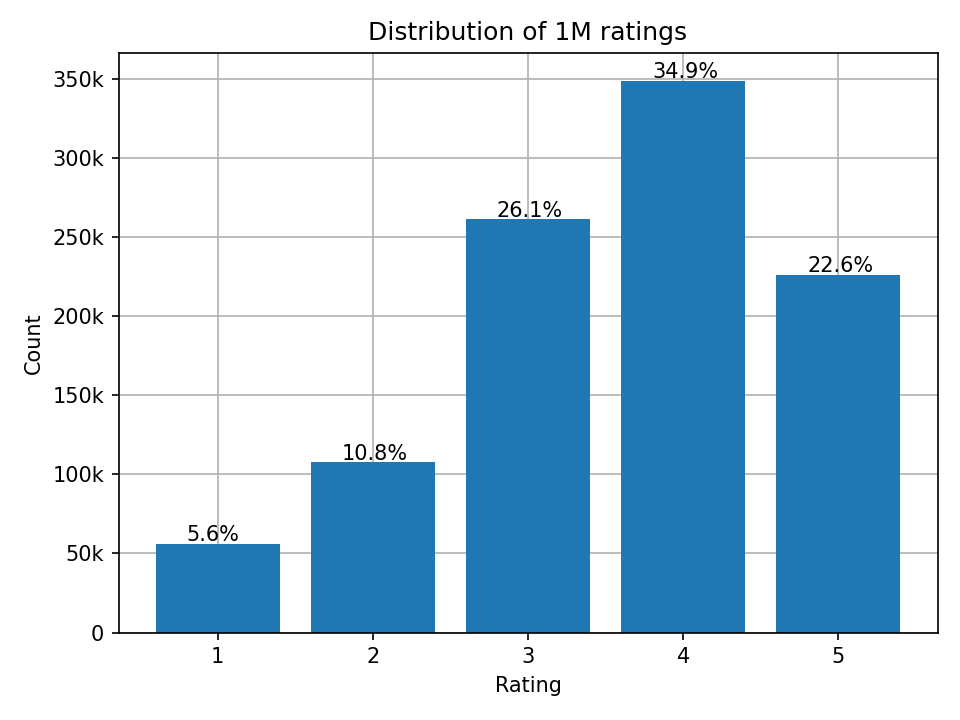

In [10]:
# Create a Figure with Axes
fig1, ax= plt.subplots()

# Coordinates 
x1 = data_rating.index
y1 = data_rating.values
text = ['{:.1f}%'.format(val) for val in (data_rating.values / data_csv.shape[0] * 100)]

# Draw the bars and add the text
ax.bar(x1, y1, zorder=2)
for r in range(0, 5):
    ax.text(x1[r]-0.2, y1[r]+1500, text[r])

# Update the yticks
locs, labels = plt.yticks()
locs_updated = ['%dk'%(round(v/1000)) if v!=0 else '0' for v in locs]
plt.yticks(ticks=locs[:-1], labels=locs_updated[:-1])

# Title and X, Y Labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of 1M ratings')

# Some additional functions
ax.grid(zorder=0)
fig1.tight_layout()

# Save and show figure
fig1.savefig('../datasets/images/1. ratings bar.pdf')
fig1.show()

## Number Ratings per User

<IPython.core.display.Javascript object>


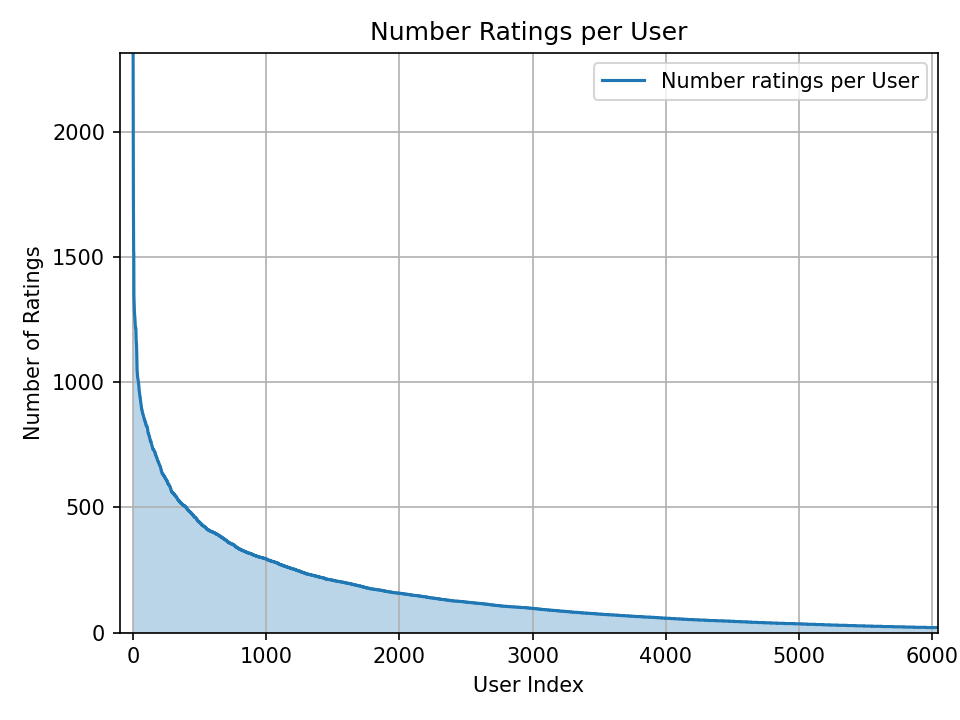

In [11]:
# Create a Figure with Axes
fig2, ax = plt.subplots()

# Coordinates 
x2 = list(range(1, num_users + 1))
y2 = sorted(data_user.values, reverse=True)

# Draw the lines
ax.plot(x2, y2, label='Number ratings per User')

# Fill the area
ax.fill_between(x2, y2, alpha=0.3)

# Title and X, Y Labels
ax.set_xlabel('User Index')
ax.set_ylabel('Number of Ratings')
ax.set_title('Number Ratings per User')

# Some additional functions
ax.grid()
ax.legend()
fig2.tight_layout()
ax.axis([-100, max(x2), 0, max(y2)])

# Save and show figure
fig2.savefig('../datasets/images/2. ratings per user.pdf')
fig2.show()

## Number Ratings per Movie

<IPython.core.display.Javascript object>


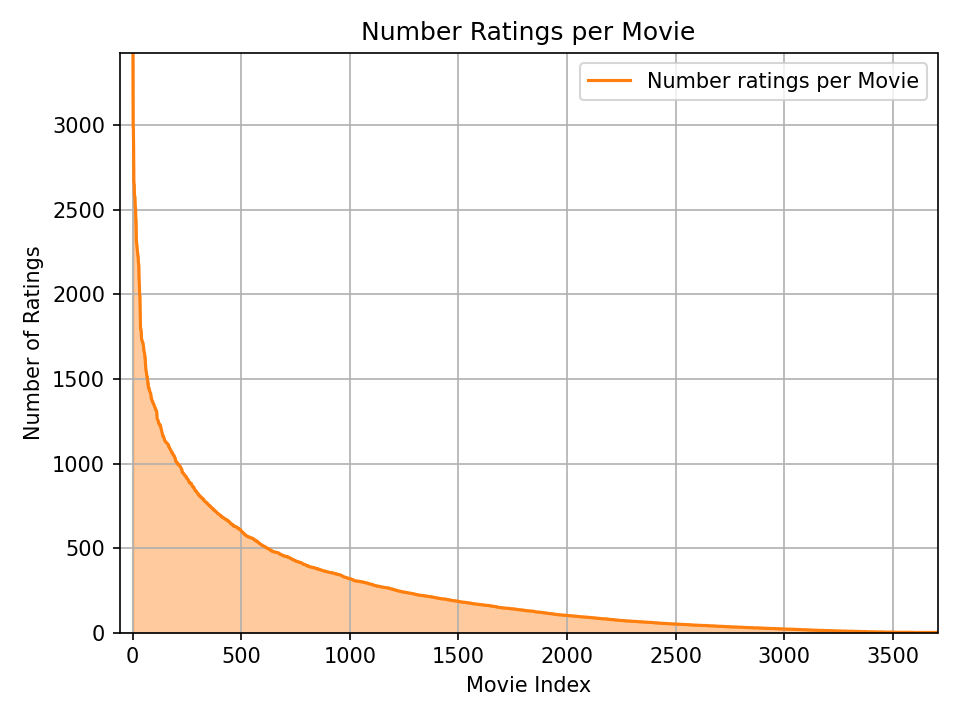

In [12]:
# Create a Figure with Axes
fig3, ax = plt.subplots()

# Coordinates 
x3 = list(range(1, num_items + 1))
y3 = sorted(data_item.values, reverse=True)

# Draw the lines
ax.plot(x3, y3, color='#ff7f0e', label='Number ratings per Movie')

# Fill the area
ax.fill_between(x3, y3, color='#ff7f0e', alpha=0.4)

# Title and X, Y Labels
ax.set_xlabel('Movie Index')
ax.set_ylabel('Number of Ratings')
ax.set_title('Number Ratings per Movie')

# Some additional functions
ax.grid()
ax.legend()
fig3.tight_layout()
ax.axis([-60, max(x3), 0, max(y3)])

# Save and show figure
fig3.savefig('../datasets/images/3. ratings per movie.pdf')
fig3.show()

In [13]:
# index_user = list(range(1, len(data_user.values) + 1))
# rating_user = sorted(data_user.values, reverse=True)
# index_item = list(range(1, len(data_item.values) + 1))
# rating_item = sorted(data_item.values, reverse=True)

In [14]:
# Choose a style
# print(plt.style.available)
# plt.style.use('default')
# plt.xkcd() # cartoon style

# Plot attributes
# plot(x, y, color='g', marker='o', linestyle='--', linewidth=2, markersize=12, label='User Name')

# Plot figure for 1 Movie
# data_csv.loc[data_csv['item'] == 2]['rating'].hist()
# plt.xlabel('rating')
# plt.ylabel('Number of ratings')
# plt.title('Number of ratings movie_id=2 has received')
# plt.show()

In [15]:
count = data_csv['user'].value_counts() # Shows how many rating for each movie they have
u = count.index.values  # Items
c = count.values        # Counts

black_list = pd.DataFrame({'user': u, 'count': c}, columns=['user', 'count'])
black_list = black_list[black_list['count'] <= 20] # List of movies that have less than 2 ratings
rare_users = black_list['user'].tolist() # Convert to list
print(rare_users[0:10])
print(len(rare_users))
black_list  

[3407, 4383, 4991, 4419, 98, 1406, 4463, 2128, 5215, 2584]
86


,user,count
5954,3407,20
5955,4383,20
5956,4991,20
5957,4419,20
5958,98,20
...,...,...
6035,761,20
6036,1493,20
6037,5533,20
6038,2714,20


<IPython.core.display.Javascript object>


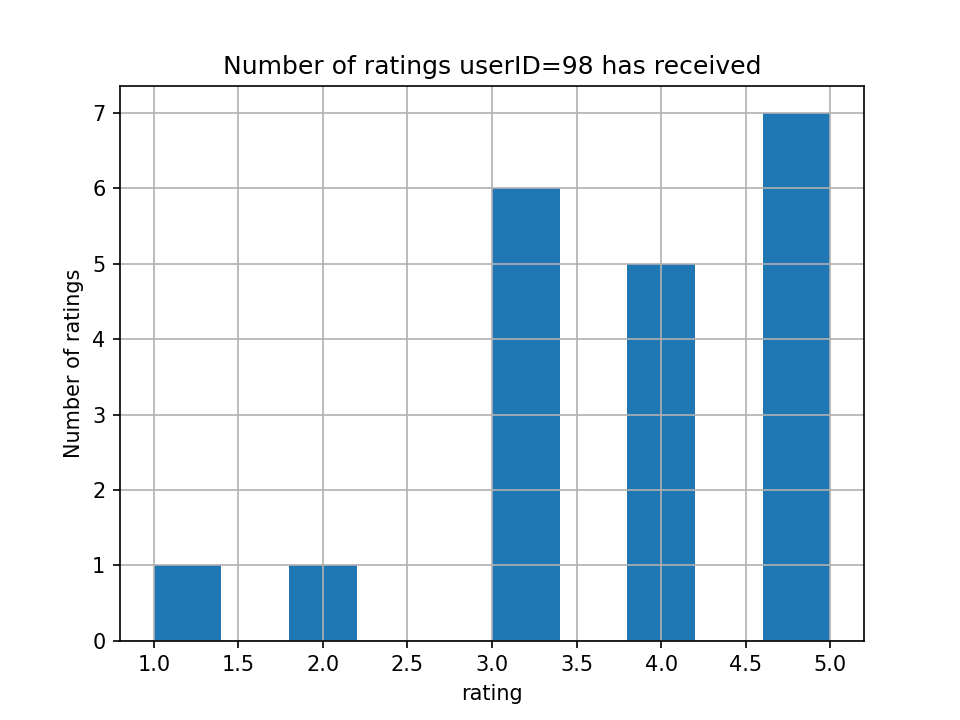

In [16]:
# Plot figure for 1 Movie
# data_csv.loc[data_csv['item'] == 5533]['rating'].hist()
fig4, ax = plt.subplots()
userID = 98
data_csv.loc[data_csv['user'] == userID]['rating'].hist()

ax.set_xlabel('rating')
ax.set_ylabel('Number of ratings')
ax.set_title('Number of ratings userID={0} has received'.format(userID))
fig4.show()

In [17]:
# from collections import Counter

# import matplotlib.pyplot as plt
# import matplotlib
# %matplotlib notebook
# matplotlib.style.use('ggplot')

# counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('302')]])
# pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
# plt.xlabel('Rating value')
# plt.ylabel('Number of users')
# plt.title('Number of users having rated item 302')